In [1]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import spearmanr
from decimal import Decimal

In [2]:
default_colors = {
    "indigo": "#332288",
    "cyan": "#88CCEE",
    "teal": "#44AA99",
    "green": "#117733",
    "olive": "#999933",
    "sand": "#DDCC77",
    "rose": "#CC6677",
    "wine": "#882255",
    "purple": "#AA4499",
    "grey": "#DDDDDD",
}

eval_setting_map = {
    "identity": default_colors["wine"],
    "CAROT": default_colors["cyan"],
    "conCAROT": default_colors["indigo"],
    "within condition": default_colors["green"],
}

geneset_map = {
    "functional": default_colors["olive"],
    "functional+score": default_colors["rose"],
    "HVG": default_colors["teal"],
    "random": default_colors["sand"],
}

subset_map = {
    "CD4": default_colors["teal"],
    "CD8": default_colors["purple"],
}

ot_map = {
    "source": default_colors["cyan"],
    "target": default_colors["sand"],
    "transport": default_colors["rose"],
    "rest": default_colors["grey"]
}


In [3]:
sns.set(font="Arial")
sns.set_context("paper")
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['ytick.left'] = True

# CAROT results

In [4]:
with open("/path/to/CAR_variants.txt", "r") as f:
    cars = f.read().splitlines()

base_log_dir = "/path/to/experiments/monge/FuncScore/logs/"
experiment_order = ["CAROT", "identity", "within condition"]

In [5]:
all_mean_stats = []
for subset in ["CD4", "CD8"]:
    for car in cars:
        if car in ["NA-NA-z", "NA-NA-NA"]:
            continue
        with open(f"{base_log_dir}{subset}__NA-NA-NA_{car}_logs.yaml") as stream:
            logs = yaml.safe_load(stream)
        print(subset, car, len(logs["experiments"]))
        for i, exp in enumerate(logs["experiments"]):
            mean_stats = pd.DataFrame.from_dict(logs["experiments"][i]["mean_statistics"], orient="index")
            mean_stats['CAR'] = car
            mean_stats["setting"] = experiment_order[i]
            mean_stats["subset"] = subset

            all_mean_stats.append(mean_stats)

CD4 41BB-41BB-z 3
CD4 41BB-CD28-z 3
CD4 41BB-CD40-z 3
CD4 41BB-CTLA4-z 3
CD4 41BB-IL15RA-z 3
CD4 41BB-NA-z 3
CD4 CD28-41BB-z 3
CD4 CD28-CD28-z 3
CD4 CD28-CD40-z 3
CD4 CD28-CTLA4-z 3
CD4 CD28-IL15RA-z 3
CD4 CD28-NA-z 3
CD4 CD40-41BB-z 3
CD4 CD40-CD28-z 3
CD4 CD40-CD40-z 3
CD4 CD40-CTLA4-z 3
CD4 CD40-IL15RA-z 3
CD4 CD40-NA-z 3
CD4 CTLA4-41BB-z 3
CD4 CTLA4-CD28-z 3
CD4 CTLA4-CD40-z 3
CD4 CTLA4-CTLA4-z 3
CD4 CTLA4-IL15RA-z 3
CD4 CTLA4-NA-z 3
CD4 IL15RA-41BB-z 3
CD4 IL15RA-CD28-z 3
CD4 IL15RA-CD40-z 3
CD4 IL15RA-CTLA4-z 3
CD4 IL15RA-IL15RA-z 3
CD4 IL15RA-NA-z 3
CD8 41BB-41BB-z 3
CD8 41BB-CD28-z 3
CD8 41BB-CD40-z 3
CD8 41BB-CTLA4-z 3
CD8 41BB-IL15RA-z 3
CD8 41BB-NA-z 3
CD8 CD28-41BB-z 3
CD8 CD28-CD28-z 3
CD8 CD28-CD40-z 3
CD8 CD28-CTLA4-z 3
CD8 CD28-IL15RA-z 3
CD8 CD28-NA-z 3
CD8 CD40-41BB-z 3
CD8 CD40-CD28-z 3
CD8 CD40-CD40-z 3
CD8 CD40-CTLA4-z 3
CD8 CD40-IL15RA-z 3
CD8 CD40-NA-z 3
CD8 CTLA4-41BB-z 3
CD8 CTLA4-CD28-z 3
CD8 CTLA4-CD40-z 3
CD8 CTLA4-CTLA4-z 3
CD8 CTLA4-IL15RA-z 3
CD8 CTLA4-NA

In [6]:
monge_res = pd.concat(all_mean_stats).reset_index().rename(columns={"index": "metric", 0:"score"})
monge_res

,metric,score,CAR,setting,subset
0,mean_wasserstein,5.668510,41BB-41BB-z,CAROT,CD4
1,mean_mmd,0.024757,41BB-41BB-z,CAROT,CD4
2,mean_sinkhorn div,5.192612,41BB-41BB-z,CAROT,CD4
3,mean_monge_gap,11.405769,41BB-41BB-z,CAROT,CD4
4,mean_drug_signature,0.731012,41BB-41BB-z,CAROT,CD4
...,...,...,...,...,...
1075,mean_mmd,0.012517,IL15RA-NA-z,within condition,CD8
1076,mean_sinkhorn div,5.679140,IL15RA-NA-z,within condition,CD8
1077,mean_monge_gap,12.339099,IL15RA-NA-z,within condition,CD8
1078,mean_drug_signature,0.805206,IL15RA-NA-z,within condition,CD8


# CMonge results

In [7]:
exp_order = ["conCAROT", "identity"] + ["within condition"]*32

all_mean_metrics = []
for subset in ["CD4", "CD8"]:
    for embedding in ["esm_XL_tail_dim"]:
        with open(f"/path/to/experiments/cmonge/sel_CARs_LN_True_grad_acc_4_cosine/{subset}_{embedding}_FuncScore/logs.yaml") as stream:
            logs = yaml.safe_load(stream)
        if len(logs["experiments"])==68:
            print("using only the first 34 logs")
            logs["experiments"]=logs["experiments"][:34]
        print(subset, embedding, len(logs["experiments"]))
        
        for i in range(len(logs["experiments"])):
            eval_setting = exp_order[i]
            for condition, results in logs["experiments"][i]["valid-set"].items():
                res = pd.Series(results["mean_statistics"])
                res = res.reset_index(drop=False).rename(columns={"index": "metric", 0: "score"})
                res["embedding"] = embedding
                res["eval_car"] = condition
                res["eval_setting"] = eval_setting
                res["subset"] = subset
                all_mean_metrics.append(res)

CD4 esm_XL_tail_dim 18
CD8 esm_XL_tail_dim 16


In [8]:
cmonge_res = pd.concat(all_mean_metrics).reset_index(drop=True)
cmonge_res = cmonge_res[~cmonge_res["eval_car"].isin(["NA-NA-NA", "NA-NA-z"])]
cmonge_res.loc[cmonge_res["embedding"]=="esm_XL_tail_dim", "embedding"] = "ESM XL"
cmonge_res

,metric,score,embedding,eval_car,eval_setting,subset
0,mean_wasserstein,5.533756,ESM XL,CD28-IL15RA-z,conCAROT,CD4
1,mean_mmd,0.026047,ESM XL,CD28-IL15RA-z,conCAROT,CD4
2,mean_sinkhorn div,5.047623,ESM XL,CD28-IL15RA-z,conCAROT,CD4
3,mean_monge_gap,11.387654,ESM XL,CD28-IL15RA-z,conCAROT,CD4
4,mean_drug_signature,0.756655,ESM XL,CD28-IL15RA-z,conCAROT,CD4
...,...,...,...,...,...,...
535,mean_mmd,0.014717,ESM XL,41BB-41BB-z,within condition,CD8
536,mean_sinkhorn div,5.485166,ESM XL,41BB-41BB-z,within condition,CD8
537,mean_monge_gap,12.362149,ESM XL,41BB-41BB-z,within condition,CD8
538,mean_drug_signature,0.886871,ESM XL,41BB-41BB-z,within condition,CD8


# Comparison

In [9]:
sel_cmonge = cmonge_res[(cmonge_res["metric"]=="mean_r2")&(cmonge_res["eval_setting"]=="conCAROT")]

sel_monge = monge_res[(monge_res["metric"]=="mean_r2")&(monge_res["setting"]=="CAROT")].rename(columns={"setting":"eval_setting",
                                                                                                        "CAR": "eval_car"})
sel_monge = pd.merge(sel_cmonge[["eval_car", "subset"]], sel_monge, on=["subset", "eval_car"])

In [10]:
plt_data = pd.concat([sel_monge, sel_cmonge]).reset_index(drop=True)
plt_data

,eval_car,subset,metric,score,eval_setting,embedding
0,CD28-IL15RA-z,CD4,mean_r2,0.983208,CAROT,NaN
1,CD28-NA-z,CD4,mean_r2,0.969667,CAROT,NaN
2,IL15RA-NA-z,CD4,mean_r2,0.982303,CAROT,NaN
3,IL15RA-IL15RA-z,CD4,mean_r2,0.979990,CAROT,NaN
4,41BB-CD28-z,CD4,mean_r2,0.977851,CAROT,NaN
5,IL15RA-CD28-z,CD4,mean_r2,0.983777,CAROT,NaN
6,IL15RA-41BB-z,CD4,mean_r2,0.970399,CAROT,NaN
7,41BB-IL15RA-z,CD4,mean_r2,0.981238,CAROT,NaN
8,CD28-CD28-z,CD4,mean_r2,0.972457,CAROT,NaN
9,CD28-CD40-z,CD4,mean_r2,0.980595,CAROT,NaN


<Axes: xlabel='subset', ylabel='score'>

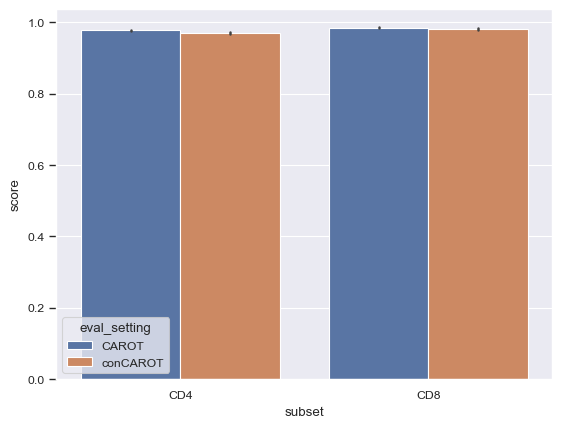

In [11]:
sns.barplot(data=plt_data, x="subset", y="score", hue="eval_setting")

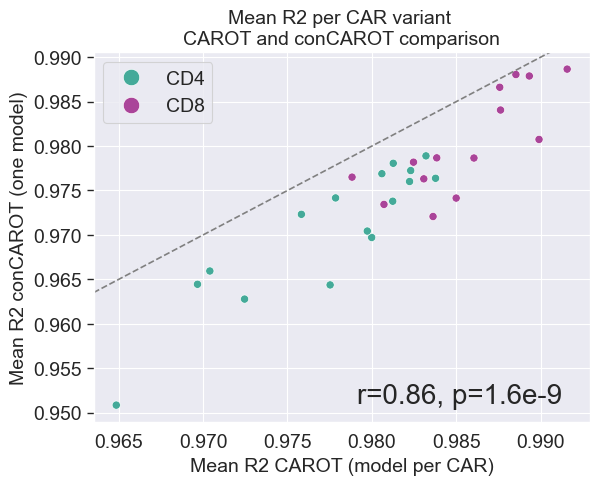

In [12]:
plt_data = pd.merge(sel_monge, sel_cmonge, on=["eval_car", "subset"], suffixes=("_monge", "_cmonge")).reset_index(drop=True)

sns.scatterplot(data=plt_data, x="score_monge", y="score_cmonge", hue="subset", palette=subset_map, s=35)
plt.axline(slope=1, xy1=(0.97,0.97), linestyle="--", color="grey")
plt.xlabel("Mean R2 CAROT (model per CAR)", fontsize=14)
plt.ylabel("Mean R2 conCAROT (one model)", fontsize=14)
plt.title("Mean R2 per CAR variant \nCAROT and conCAROT comparison", fontsize=14)
plt.tick_params(axis='both', which='both', labelsize=14)
plt.legend(fontsize=14, title_fontsize=14, markerscale=2)

spearman = round(spearmanr(plt_data[["score_monge", "score_cmonge"]]).statistic, 2)
pval = Decimal(spearmanr(plt_data[["score_monge", "score_cmonge"]]).pvalue)
pval = '{:.1e}'.format(pval)
plt.annotate(f"r={spearman}, p={pval}", xy=(0.53, 0.05), xycoords="axes fraction", fontsize=20)
plt.savefig("/path/to/Figures/cmonge_monge_comparison.pdf", bbox_inches='tight')